<h2 style="color:#c77dff;">1-L'IMPORTATION DES BIBLIOTHÈQUES </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


import warnings 

<h2 style="color:#c77dff;">2- AFFICHAGE LES PREMIERE LIGNES DE DATASET</h2>

In [2]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive - OFPPT\Bureau\Mobile-Device-Usage-and-User-Behavior-Dataset\machine learning\user_behavior_dataset.csv")
data.head()

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<h2 style="color:#c77dff;">3- DESCRIPTION DES VARIABLES</h2>

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; text-align: left; font-family: Arial, sans-serif;">
  <thead style="background-color:#c77dff; color:white;">
    <tr>
      <th>Colonnes</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>User_ID</td>
      <td>Identifiant_utilisateur</td>
    </tr>
    <tr>
      <td>Device_Model</td>
      <td>Modèle_appareil</td>
    </tr>
    <tr>
      <td>Operating_System</td>
      <td>Système_d_exploitation</td>
    </tr>
    <tr>
      <td>App_Usage_Time</td>
      <td>Temps_utilisation_applications</td>
    </tr>
    <tr>
      <td>Screen_On_Time</td>
      <td>Temps_écran_allumé</td>
    </tr>
    <tr>
      <td>Battery_Drain</td>
      <td>Consommation_batterie</td>
    </tr>
    <tr>
      <td>Number_of_Apps_Installed</td>
      <td>Nombre_applications_installées</td>
    </tr>
    <tr>
      <td>Data_Usage</td>
      <td>Consommation_données</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Âge</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>Sexe</td>
    </tr>
    <tr>
      <td>User_Behavior_Class</td>
      <td>Classe_comportement_utilisateur</td>
    </tr>
  </tbody>
</table>


<h2 style="color:#c77dff;">4- DESCRIPTION GENERALE DES VARIABLES</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   700 non-null    int64  
 1   Device_Model              700 non-null    object 
 2   Operating_System          700 non-null    object 
 3   App_Usage_Time            700 non-null    int64  
 4   Screen_On_Time            700 non-null    float64
 5   Battery_Drain             700 non-null    int64  
 6   Number_of_Apps_Installed  700 non-null    int64  
 7   Data_Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User_Behavior_Class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


<h2 style="color:#c77dff;">5- DETECTER LES VALEURS MANQUANTES</h2>

In [4]:
data.isnull().sum()

User_ID                     0
Device_Model                0
Operating_System            0
App_Usage_Time              0
Screen_On_Time              0
Battery_Drain               0
Number_of_Apps_Installed    0
Data_Usage                  0
Age                         0
Gender                      0
User_Behavior_Class         0
dtype: int64

<h2 style="color:#c77dff;">6- DES STATISTIQUES DESCRIPTIVES</h2>

In [5]:
data.describe()

,User_ID,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,User_Behavior_Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


<h2 style="color:#c77dff;">7- VALEURS UNIQUES DES VARIABLES CATÉGORIQUES</h2>

In [6]:
for column in data.select_dtypes(include = object).columns:
    print(column, ":" , data[column].unique(),"\n")

Device_Model : ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21'] 

Operating_System : ['Android' 'iOS'] 

Gender : ['Male' 'Female'] 



<h2 style="color:#c77dff;">8- VALEURS UNIQUES DES VARIABLES NUMÉRIQUES</h2>

In [7]:
for column in data.select_dtypes(include=["int64", "float64"]).columns:
    print(column, ":", data[column].unique(), "\n")

User_ID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

<h2 style="color:#c77dff;">9- LES VARIABLES ABERANTES : </h2>

In [8]:
numeric_cols = [
    "App_Usage_Time",
    "Screen_On_Time",
    "Battery_Drain",
    "Number_of_Apps_Installed",
    "Data_Usage",
    "Age",
    "User_Behavior_Class"
]
# Détection des valeurs aberrantes avec IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\n🔸 Colonne : {col}")
    print(f"Nombre de valeurs aberrantes : {outliers.shape[0]}")


🔸 Colonne : App_Usage_Time
Nombre de valeurs aberrantes : 0

🔸 Colonne : Screen_On_Time
Nombre de valeurs aberrantes : 0

🔸 Colonne : Battery_Drain
Nombre de valeurs aberrantes : 0

🔸 Colonne : Number_of_Apps_Installed
Nombre de valeurs aberrantes : 0

🔸 Colonne : Data_Usage
Nombre de valeurs aberrantes : 0

🔸 Colonne : Age
Nombre de valeurs aberrantes : 0

🔸 Colonne : User_Behavior_Class
Nombre de valeurs aberrantes : 0


<h2 style="color:#c77dff;">10-Prétraitement + Modélisation + Évaluation</h2>

<h3 style="color:#a3b18a;">ÉTAPE 1 — Définir Features (X) et Target (y)</h3>

In [9]:
# X : variables explicatives
X = data.drop(columns=["User_ID", "User_Behavior_Class"])

# y : variable cible
y = data["User_Behavior_Class"]


<h3 style="color:#a3b18a;">ÉTAPE 2 — Encodage des variables catégorielles</h3>

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ["Device_Model", "Operating_System", "Gender"]
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


<h3 style="color:#a3b18a;">ÉTAPE 3 — Normalisation des variables numériques</h3>

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

<h3 style="color:#a3b18a;">ÉTAPE 4 — Séparation Train / Test</h3>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<h3 style="color:#a3b18a;">ÉTAPE 5 — Modélisation - Classification supervisée</h3>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("scaling", scaler),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

# Entraînement du modèle
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Device_Model',
                                                   'Operating_System',
                                                   'Gender']),
                                                 ('num', 'passthrough',
                                                  Index(['App_Usage_Time', 'Screen_On_Time', 'Battery_Drain',
       'Number_of_Apps_Installed', 'Data_Usage', 'Age'],
      dtype='object'))])),
                ('scaling', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

<h3 style="color:#a3b18a;">ÉTAPE 6 — Évaluation du modèle</h3>

In [14]:
# Prédictions
y_pred = model.predict(X_test)

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 1.0


In [17]:
#Rapport de classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



<h2 style="color:#c77dff;">11-Analyse des résultats</h2>

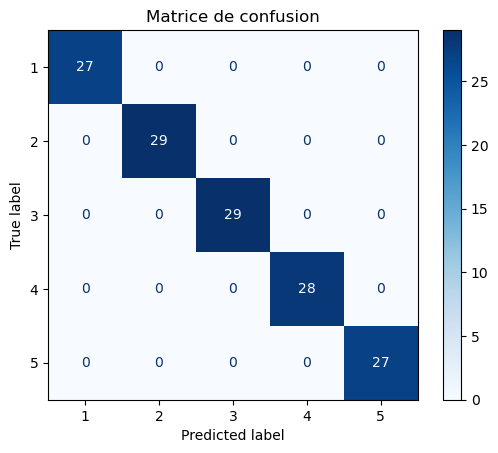

                                 Feature  Importance
9          num__Number_of_Apps_Installed    0.230197
8                     num__Battery_Drain    0.222712
6                    num__App_Usage_Time    0.220704
10                       num__Data_Usage    0.186319
7                    num__Screen_On_Time    0.134008
11                              num__Age    0.002841
5                       cat__Gender_Male    0.001059
1   cat__Device_Model_Samsung Galaxy S21    0.000675
0            cat__Device_Model_OnePlus 9    0.000435
2         cat__Device_Model_Xiaomi Mi 11    0.000404


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

# Importance des features pour Random Forest
import numpy as np
import pandas as pd

feature_names = model.named_steps['preprocessing'].get_feature_names_out()
importances = model.named_steps['classifier'].feature_importances_

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)
print(feat_imp.head(10))  


<h2 style="color:#c77dff;">12- Ajustement du modèle (Hyperparameter tuning)</h2>

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10,
                            cv=3, scoring='accuracy', random_state=42)
search.fit(X_train, y_train)

print("Meilleurs paramètres :", search.best_params_)
print("Meilleure accuracy :", search.best_score_)


Meilleurs paramètres : {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 5}
Meilleure accuracy : 1.0


<h2 style="color:#c77dff;">13- Sauvegarde du modèle</h2>

In [ ]:
feature_names = model.named_steps['preprocessing'].get_feature_names_out()
importances = model.named_steps['classifier'].feature_importances_

df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df.to_csv("feature_importance.csv", index=False)


<h2 style="color:#c77dff;">14- Prédiction sur de nouvelles données</h2>

In [ ]:
# voila une nouvelle exemple pour observation 
new_data = pd.DataFrame({
    "Device_Model": ["iPhone 12"],
    "Operating_System": ["iOS"],
    "Gender": ["Male"],
    "App_Usage_Time": [300],
    "Screen_On_Time": [5],
    "Battery_Drain": [1400],
    "Number_of_Apps_Installed": [50],
    "Data_Usage": [1000],
    "Age": [30]
})

pred_class = model.predict(new_data)
print("Classe prédite :", pred_class[0])


Classe prédite : 3


<h2 style="color:#c77dff;">15- Rapport final / Visualisation</h2>

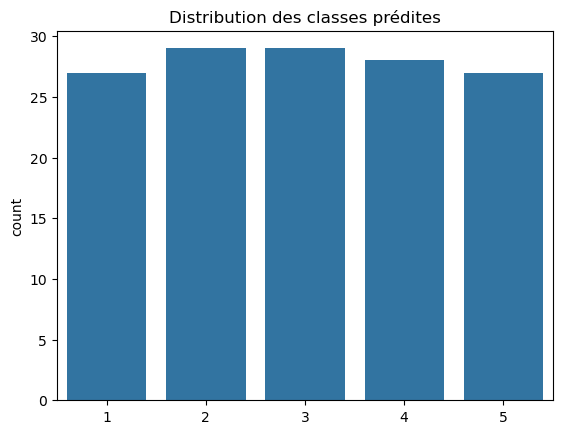

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme des classes prédites
sns.countplot(x=y_pred)
plt.title("Distribution des classes prédites")
plt.show()
